In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#显示中文(根据自己电脑设置)
plt.rcParams['font.sans-serif'] = ['SimHei']
#显示负数
plt.rcParams['axes.unicode_minus'] = False

In [3]:
data = np.genfromtxt('data/ex1data2.txt',delimiter=',')
print(data[:3])
x,y = data[:,:-1],data[:,-1]

#可以看出第一列和第二列数据取值范围差距大，梯度下降慢，
#于是进行预处理，使他们的范围缩小到-1到1

[[2.104e+03 3.000e+00 3.999e+05]
 [1.600e+03 3.000e+00 3.299e+05]
 [2.400e+03 3.000e+00 3.690e+05]]


In [4]:
#预处理函数

def preProcess(x,y):
    #数据归一化方法之一：z-score规范化（或零均值规范化）：v'=(v-属性A的均值E)/属性A的标准差
    x-=np.mean(x,axis = 0)
    x/=np.std(x,axis=0,ddof=1)
    #ddof eans Delta Degrees of Freedom. The divisor used in calculations is N - ddof, where N represents the number of elements. By default ddof is zero.
    
    #在x前加上一列1  方便代码中的矩阵操作
    x = np.c_[np.ones(len(x)),x]
    y = np.c_[y]
    #np.c_是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等。
    return x,y

In [5]:
x,y = preProcess(x,y)

In [6]:
#定义模型

def model(x, theta):
    h = np.dot(x,theta)#点乘，点积
    return h

In [7]:
#损失函数
def costFunc(h,y):
    m = len(y)
    J = 1.0/(2*m)*np.sum(np.square(h-y))
    return J

In [8]:
#梯度下降算法实现

alpha = 0.01
iter_num = 30

def graDesc(x,y,alpha,iter_num):
    m,n = x.shape
    
    #初始化theta值
    theta = np.zeros((n,1))
    #初始化代价值
    J_history = np.zeros(iter_num)
    
    #循环迭代，参数更新
    for i in range(iter_num):
        h = model(x,theta)
        J_history[i] = costFunc(h,y)
        #梯度下降算法 矩阵表达
        deletaTheta = 1.0/m*np.dot(x.T,h-y)
        print(deletaTheta.shape)
        theta-=alpha*deletaTheta
        print(theta.shape)
    return J_history,theta

#调用函数
J_history,theta = graDesc(x,y,alpha,iter_num)
#得出预测值h
h = model(x,theta)

(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)


In [55]:
def score(h,y):
    u = np.sum(np.square(h-y))
    v = np.sum(np.square(y-np.mean(y)))
    score = 1-u/v
    return score
print('该模型的精度为：',score(h,y))

该模型的精度为： 0.732945018027817


上面这个精度用到的是R方公式，R²越接近于1，则拟合回归效果越好。
更多方法见：
[衡量线性回归算法准确度的几个指标](https://blog.csdn.net/weixin_47994250/article/details/108646200)

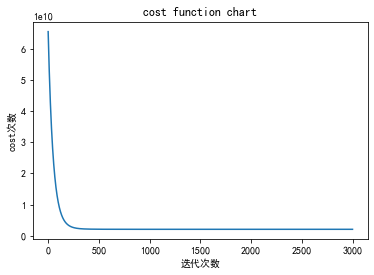

In [56]:
#可视化展示

plt.title('cost function chart')
plt.plot(range(iter_num),J_history)
plt.xlabel('迭代次数')
plt.ylabel('cost次数')
plt.show()

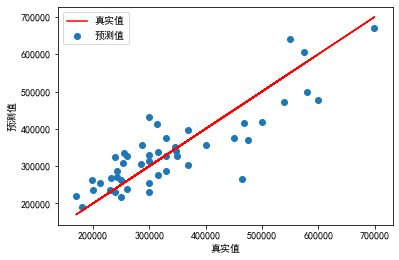

In [57]:
plt.plot(y,y,label='真实值',color='red')
plt.scatter(y,h,label='预测值')
plt.xlabel('真实值')
plt.ylabel('预测值')
plt.legend()
plt.show()